In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/kerim/.cache/kagglehub/datasets/saurabhshahane/road-traffic-accidents/versions/3/RTA Dataset.csv')  # Replace backslashes with forward slashes

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0      

In [4]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_alli

In [44]:
print("\nSummary Statistics:")
print(df.describe(include='object'))


Summary Statistics:
       Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
count        12316              12316         12316               12316   
unique           7                  5             3                   7   
top         Friday              18-30          Male  Junior high school   
freq          2041               4271         11437                8360   

       Vehicle_driver_relation Driving_experience Type_of_vehicle  \
count                    12316              12316           12316   
unique                       4                  7              17   
top                   Employee             5-10yr      Automobile   
freq                     10206               4192            4155   

       Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
count             12316                   12316             12316  ...   
unique                4                       6                 3  ...   
top               Owner            

In [43]:
# describe categorical columns
df.describe(include='object')

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,7,5,3,7,4,7,17,4,6,3,...,13,4,3,6,4,7,5,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,8360,10206,4192,4155,10941,6811,12204,...,8466,4944,5253,4443,7076,9101,12243,11390,2263,10415


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicate rows (if any)
df = df.drop_duplicates()
print("\nDuplicate rows removed.")


Missing Values:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_cas

In [7]:
# Handle missing values (if any)
# For numerical columns, fill missing values with the median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# For categorical columns, fill missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nMissing values handled.")

# Convert 'Time' column to datetime format
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')  # Specify the correct format
    print("\n'Time' column converted to datetime format.")

# Add a new column for 'Hour' extracted from the 'Time' column
if 'Time' in df.columns:
    df['Hour'] = df['Time'].dt.hour
    print("\n'Hour' column added.")


Missing values handled.

'Time' column converted to datetime format.

'Hour' column added.


In [8]:
# Convert 'Time' column to datetime format
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')  # Specify the correct format
    print("\n'Time' column converted to datetime format.")

# Add a new column for 'Hour' extracted from the 'Time' column
if 'Time' in df.columns:
    df['Hour'] = df['Time'].dt.hour
    print("\n'Hour' column added.")



'Time' column converted to datetime format.

'Hour' column added.


In [25]:
# Query 1: Accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM)
peak_hours_accidents = df[(df['Hour'] >= 8) & (df['Hour'] <= 10) | (df['Hour'] >= 17) & (df['Hour'] <= 19)]
print("\nNumber of accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM):")
print(peak_hours_accidents.shape[0])


Number of accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM):
4779


In [32]:
# Query 2: Accidents on weekends (Saturday and Sunday)
if 'Day_of_week' in df.columns:
    weekend_accidents = df[df['Day_of_week'].isin(['Saturday', 'Sunday'])]
    print("\nNumber of accidents on weekends (Saturday and Sunday):")
    print(weekend_accidents.shape[0])



Number of accidents on weekends (Saturday and Sunday):
3133


In [33]:
# Query 3: Accidents in adverse weather conditions (Rain, Fog, Snow)
if 'Weather_conditions' in df.columns:
    adverse_weather_accidents = df[df['Weather_conditions'].isin(['Rain', 'Fog', 'Snow'])]
    print("\nNumber of accidents in adverse weather conditions (Rain, Fog, Snow):")
    print(adverse_weather_accidents.shape[0])


Number of accidents in adverse weather conditions (Rain, Fog, Snow):
61


In [47]:
# Query 4: Accidents with high severity (Severity = 3)
if 'Accident_severity' in df.columns:
    high_severity_accidents = df[df['Accident_severity'] == 3]
    print("\nNumber of high-severity accidents (Severity = 3):")
    print(high_severity_accidents.shape[0])


Number of high-severity accidents (Severity = 3):
0


In [46]:
def fatality_df(column, df=df, sort=False):
    """
    fetches a dataframe having category wise fatality frequency
    """
# finding out the relationship between Accident severity and a column
    df_hello = df.groupby(['Accident_severity', column]).Time.count().reset_index()

    # creating a list of all categories to plot
    rowlist = [row for row in df_hello[column]]
    sumlist = []
    for row in rowlist:
        sumlist.append(df_hello.loc[df_hello[column] == row].Time.sum())

    df_hello['sum'] = sumlist
    df_hello['ratio'] = df_hello['Time']/df_hello['sum']
    df_final = df_hello.loc[df_hello.Accident_severity=='Fatal injury']
    if sort==True:
        df_final = df_final.sort_values(by='ratio')
    return df_final

# example
fatal_collisiontype_df = fatality_df('Type_of_collision', sort=True)
fatal_collisiontype_df

,Accident_severity,Type_of_collision,Time,sum,ratio
3,Fatal injury,Rollover,4,397,0.010076
0,Fatal injury,Collision with animals,2,171,0.011696
4,Fatal injury,Vehicle with vehicle collision,106,8929,0.011871
2,Fatal injury,Collision with roadside objects,24,1786,0.013438
1,Fatal injury,Collision with pedestrians,22,896,0.024554


In [45]:
# Query 5: Accidents on highways
if 'Road_type' in df.columns:
    highway_accidents = df[df['Road_type'] == 'Highway']
    print("\nNumber of accidents on highways:")
    print(highway_accidents.shape[0])

In [36]:
# Query 6: Accidents with the highest number of casualties
if 'Number_of_casualties' in df.columns:
    max_casualties_accident = df[df['Number_of_casualties'] == df['Number_of_casualties'].max()]
    print("\nAccident with the highest number of casualties:")
    print(max_casualties_accident)


Accident with the highest number of casualties:
                    Time Day_of_week Age_band_of_driver Sex_of_driver  \
3692 1900-01-01 17:35:00    Saturday              31-50          Male   
3693 1900-01-01 17:35:00    Saturday              31-50          Male   
3694 1900-01-01 17:35:00    Saturday              31-50          Male   
3695 1900-01-01 17:35:00    Saturday              31-50          Male   
3696 1900-01-01 17:35:00    Saturday              31-50          Male   
3697 1900-01-01 17:35:00    Saturday              18-30          Male   
3698 1900-01-01 17:35:00    Saturday              18-30          Male   
3699 1900-01-01 17:35:00    Saturday              18-30          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
3692  Junior high school                Employee          Below 1yr   
3693  Junior high school                Employee              1-2yr   
3694   Elementary school                Employee              2-5yr   
3695     


Number of accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM):
4779


In [15]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_road_traffic_accidents.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_road_traffic_accidents.csv'.")


Cleaned dataset saved to 'cleaned_road_traffic_accidents.csv'.


In [16]:
# Data Visualization
# Set the style for seaborn
sns.set(style="whitegrid")

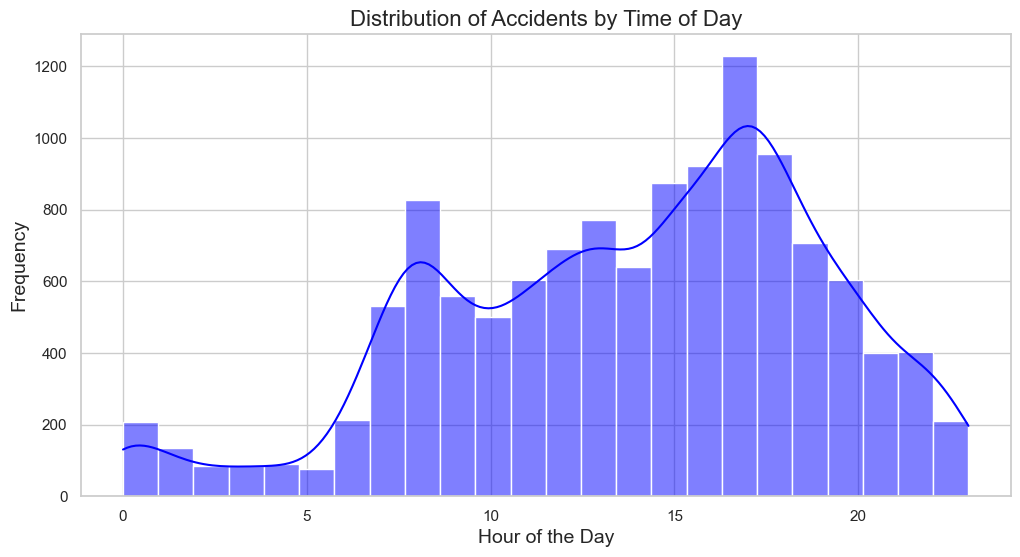

In [17]:
# 1. Distribution of accidents by time of day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title('Distribution of Accidents by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

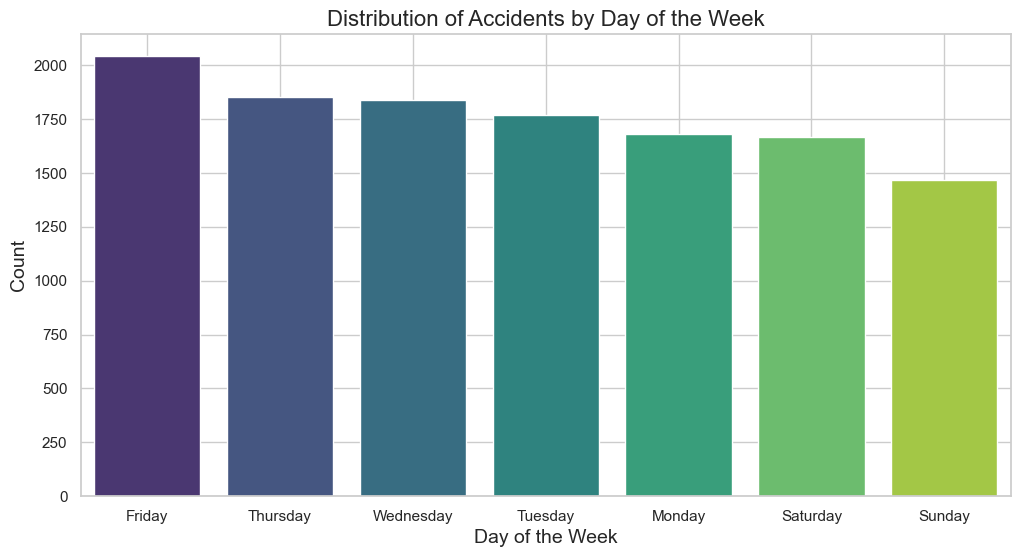

In [38]:
# 2. Distribution of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', data=df, palette='viridis', order=df['Day_of_week'].value_counts().index)
plt.title('Distribution of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

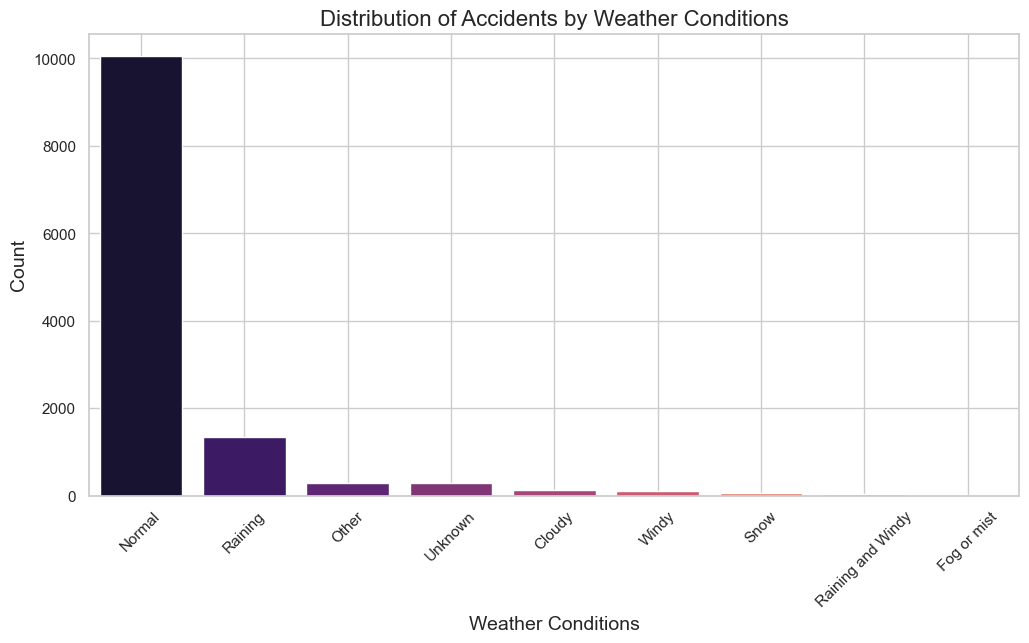

In [40]:
# 3. Distribution of accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_conditions', data=df, palette='magma', order=df['Weather_conditions'].value_counts().index)
plt.title('Distribution of Accidents by Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [41]:

# 4. Correlation heatmap of numerical variables
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

ValueError: could not convert string to float: 'Slight Injury'

<Figure size 1200x600 with 0 Axes>

In [42]:
# 5. Box plot of accidents by road type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Road_Type', y='Number_of_Casualties', data=df, palette='Set2')
plt.title('Box Plot of Accidents by Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.grid(True)
plt.show()

ValueError: Could not interpret input 'Road_Type'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# 6. Scatter plot of accidents by location
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident_Severity', data=df, palette='viridis')
plt.title('Scatter Plot of Accidents by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True)
plt.show()